# Titanic : Predictive Analysis of Survival

## The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [378]:
#import packages and classes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#read dataset
df = pd.read_csv('./dataset/train.csv')

## Loading Data and Exploratory Analysis


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Information about above features can be found on 
https://www.kaggle.com/competitions/titanic/data page

In [380]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [381]:
df.shape

(891, 12)

There are 891 records and 12 features

Lets find out gender wise survival rate

In [382]:
survived = df['Survived'].value_counts(normalize=True) *100
survived

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [383]:
print(f"Survival rate is : {round(survived[1], 2)}%")

Survival rate is : 38.38%


In [384]:
gender_survived = round(df.groupby(['Sex'])['Survived'].value_counts(normalize=True),2) *100
gender_survived = gender_survived.rename('Percentage').reset_index()

In [385]:
gender_survived

,Sex,Survived,Percentage
0,female,1,74.0
1,female,0,26.0
2,male,0,81.0
3,male,1,19.0


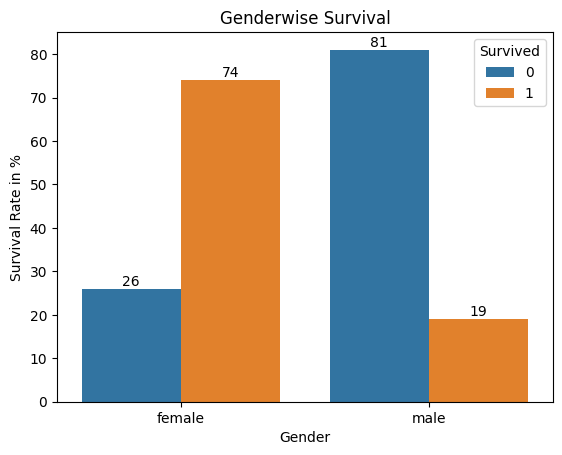

In [386]:
ax = sns.barplot(data = gender_survived, x = 'Sex', y = 'Percentage', hue = 'Survived')
plt.title('Genderwise Survival')
plt.xlabel('Gender')
plt.ylabel('Survival Rate in %')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

<b>From above bar chart we can conclude that female surival rate is more than of men.

In [387]:
age_wise_survival = df[['Age', 'Survived']].dropna() 
age_wise_survival

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
885,39.0,0
886,27.0,0
887,19.0,1
889,26.0,1


In [388]:
age_wise_survival.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Survived  714 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 16.7 KB


In [389]:
age_wise_survival['Age'] = age_wise_survival['Age'].astype(int)

In [390]:
age_wise_survival.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       714 non-null    int32
 1   Survived  714 non-null    int64
dtypes: int32(1), int64(1)
memory usage: 13.9 KB


In [391]:
age_wise_survival['Age_bins'] = pd.cut(age_wise_survival['Age'] , 
                                       bins = [0, 18, 35, 60, 100],
                                       labels=['<18', '18-35', '36-60', '61-100'])

In [392]:
age_wise_survival['Age_bins'].value_counts()

18-35     358
36-60     195
<18       132
61-100     22
Name: Age_bins, dtype: int64

In [393]:
age_wise_survival_pr = age_wise_survival.groupby(['Age_bins'])['Survived'].value_counts(normalize=True)*100

In [394]:
age_wise_survival_pr = round(age_wise_survival_pr,2)
age_wise_survival_pr

Age_bins  Survived
<18       0           52.27
          1           47.73
18-35     0           61.73
          1           38.27
36-60     0           60.00
          1           40.00
61-100    0           77.27
          1           22.73
Name: Survived, dtype: float64

In [395]:
age_wise_survival_pr = age_wise_survival_pr.rename('Percentage').reset_index()
age_wise_survival_pr

,Age_bins,Survived,Percentage
0,<18,0,52.27
1,<18,1,47.73
2,18-35,0,61.73
3,18-35,1,38.27
4,36-60,0,60.00
5,36-60,1,40.00
6,61-100,0,77.27
7,61-100,1,22.73


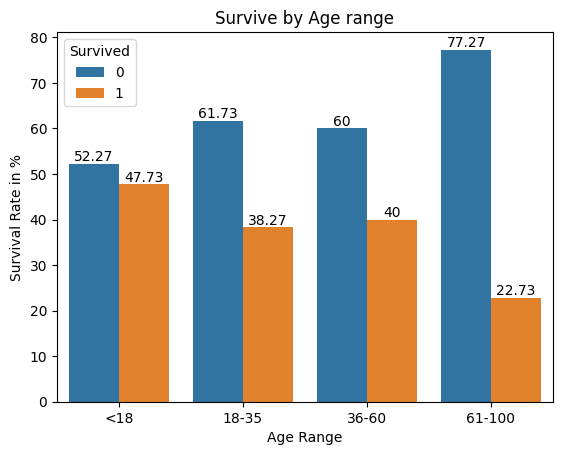

In [396]:
ax = sns.barplot(data = age_wise_survival_pr , x = 'Age_bins', y = 'Percentage', hue = 'Survived')
ax.set_title('Survive by Age range')
ax.set_ylabel('Survival Rate in %')
ax.set_xlabel('Age Range')
for i in ax.containers:
    ax.bar_label(i,)

<b> From above bar plot we can conclude that most survived age group is below 18

Lets find out is there is relationship between class  and survival. 
Survival rate of passengers by their class

In [397]:
class_wise_survived = round(df.groupby(['Pclass'])['Survived'].value_counts(normalize=True)*100, 2)
class_wise_survived

Pclass  Survived
1       1           62.96
        0           37.04
2       0           52.72
        1           47.28
3       0           75.76
        1           24.24
Name: Survived, dtype: float64

In [398]:
class_wise_survived_pr = class_wise_survived.rename('Percentage').reset_index()
class_wise_survived_pr

,Pclass,Survived,Percentage
0,1,1,62.96
1,1,0,37.04
2,2,0,52.72
3,2,1,47.28
4,3,0,75.76
5,3,1,24.24


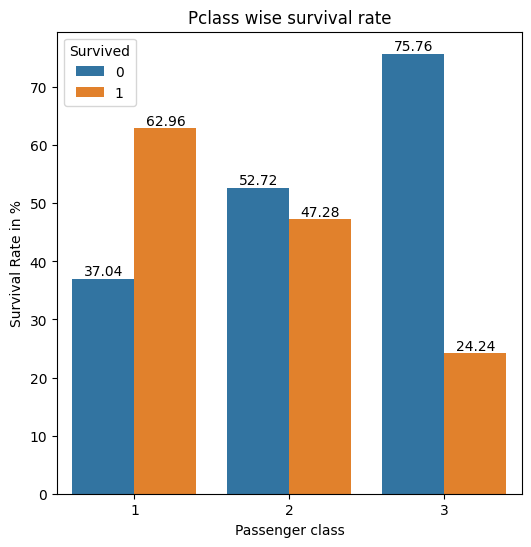

In [399]:
plt.figure(figsize=(6,6))
ax = sns.barplot(data = class_wise_survived_pr , x = 'Pclass', y = 'Percentage', hue = 'Survived')
ax.set_title('Pclass wise survival rate')
ax.set_xlabel('Passenger class')
ax.set_ylabel('Survival Rate in %')
for i in ax.containers:
    ax.bar_label(i,)


<b> From above figure we can conclude that passenger from first class are most survived class compared to other classes

Lets analyze frequency distribution of features

array([[<AxesSubplot: title={'center': 'PassengerId'}>,
        <AxesSubplot: title={'center': 'Survived'}>,
        <AxesSubplot: title={'center': 'Pclass'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'SibSp'}>,
        <AxesSubplot: title={'center': 'Parch'}>],
       [<AxesSubplot: title={'center': 'Fare'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

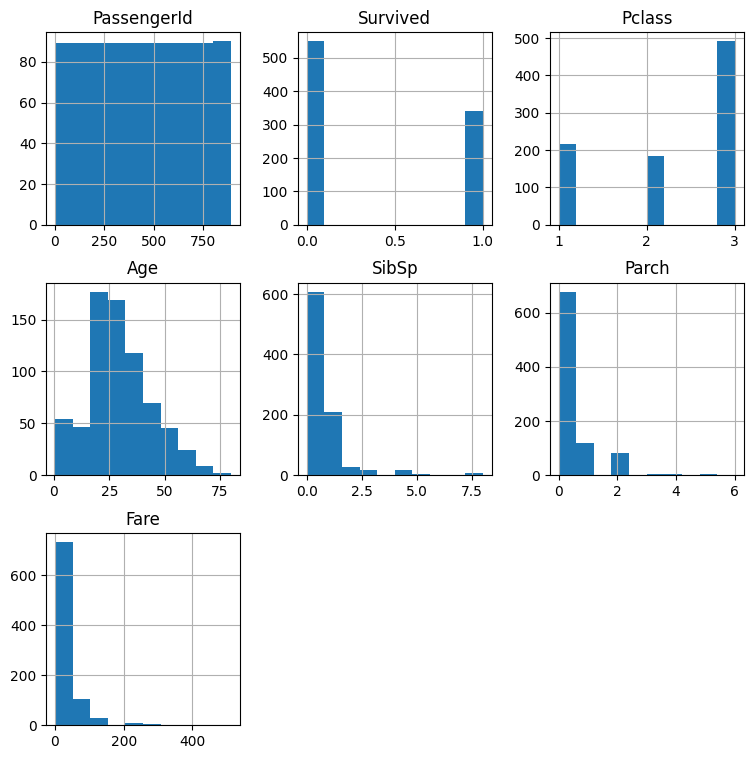

In [400]:
df.hist(figsize=(9,9))

Lets find out linear correlationship numeric between features using heatmap

In [401]:
corr = df.corr()
corr['Survived']

C:\Users\nitin\AppData\Local\Temp\ipykernel_14380\1366107123.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

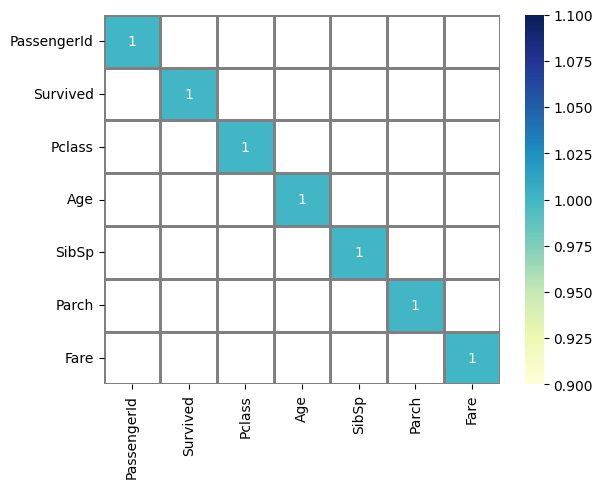

In [402]:


mask = abs(corr)<0.7
ax = sns.heatmap(corr , mask = mask,annot=True, linecolor= 'grey',
                 linewidths=2 , cmap= 'YlGnBu' )
ax.set_facecolor('white')



<b> By observing above figure , we can conclude that there is not very strong co-relationship
with variable Survival

## Feature Engineering

Lets create some new features using already existing features

In [403]:
df['GroupSize'] = df['SibSp'] + df['Parch'] +1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,GroupSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Above code created new feature called ```GroupSize``` . We can imagine that larger family group 
went through hard time escaping the sinking ship

From below image we can assume that deck A is uppermost deck and deck G is lowermost deck.
Varible deck might be useful information for machine learning algorithms
<br> Image Source = <a href = "https://upload.wikimedia.org/wikipedia/commons/0/0d/Olympic_%26_Titanic_cutaway_diagram.png"> Titanic Blueprint</a>

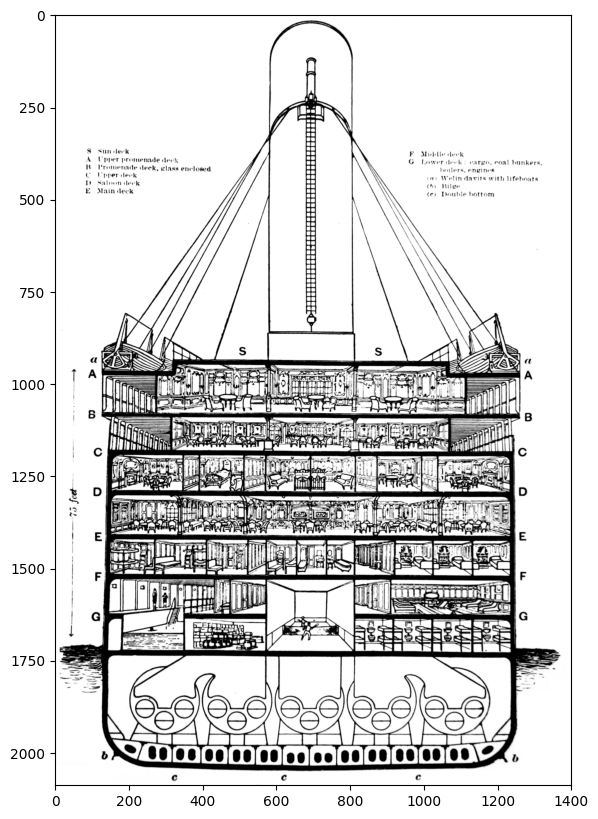

In [404]:
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
img = mpimg.imread('./images/deck.png')
plt.imshow(img)

In [405]:

df['Cabin'].fillna('NoCabin', inplace = True)
df['Deck'] = df['Cabin'].str[0]
df.Deck.value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

We can age groups using age column and drop age column 

In [406]:
#lets compute null values first 
df.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [407]:
df['Age'].median(skipna=True)

28.0

since it is integer value we can fill age with median 

In [408]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [409]:
df.Age.fillna(df['Age'].median(skipna=True), inplace= True)
df.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [410]:
df['Age'] = df['Age'].astype(int)

In [421]:
df['AgeGroup'] = pd.cut(df['Age'],
                        bins= [-1,12,18,30,50,100],
                        labels= ['Child', 'Teen', 'Adult', 'Middle-aged','Senior'])

In [422]:
df.AgeGroup.value_counts()

Adult          449
Middle-aged    239
Teen            70
Child           69
Senior          64
Name: AgeGroup, dtype: int64

Lets create bins for fare so our ml algorithm can understand in simple way

<AxesSubplot: >

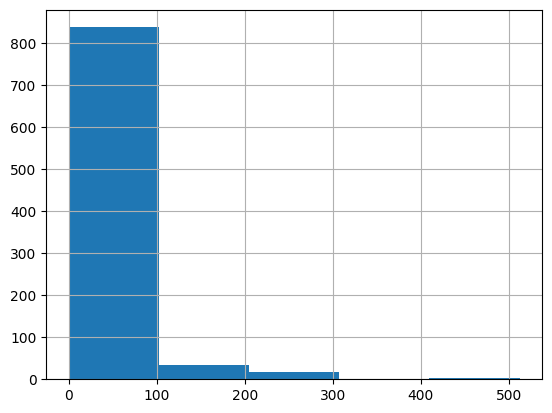

In [423]:
df.Fare.hist(bins = 5)

In [424]:
max(df.Fare)

512.3292

In [425]:
df['FareBins'] = pd.cut(df['Fare'], 
                        bins= [-1,75,150,225,300,375,450,525],
                        labels= [1,2,3,4,5,6,7])

In [426]:
df.FareBins.value_counts()

1    794
2     68
3     14
4     12
7      3
5      0
6      0
Name: FareBins, dtype: int64

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     889 non-null    object  
 12  GroupSize    891 non-null    int64   
 13  Deck         891 non-null    object  
 14  AgeGroup     891 non-null    category
 15  FareBins     891 non-null    category
dtypes: category(2), float64(1), int32(1), int64(6), object(6)
memory usage: 96.4+ KB


In [446]:
# lets add isAlone column
isAlone = df['GroupSize']==1
df['isAlone'] = isAlone


In [459]:
# We can drop some columns which are not usefull
y = df['Survived']
X = df.drop(['Survived', 'Age','PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch','Fare'], axis = 1)

In [460]:
X.columns

Index(['Pclass', 'Sex', 'GroupSize', 'Deck', 'AgeGroup', 'FareBins',
       'isAlone'],
      dtype='object')

In [454]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Pclass     891 non-null    int64   
 1   Sex        891 non-null    object  
 2   GroupSize  891 non-null    int64   
 3   Deck       891 non-null    object  
 4   AgeGroup   891 non-null    category
 5   FareBins   891 non-null    category
 6   isAlone    891 non-null    bool    
dtypes: bool(1), category(2), int64(2), object(2)
memory usage: 31.1+ KB


In [473]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
processed_X = ohe.fit_transform(X[['AgeGroup','FareBins','isAlone','Deck','GroupSize','Sex','Pclass']] , )

In [476]:
X = pd.DataFrame(processed_X , columns=ohe.get_feature_names_out())

In [477]:
X.columns

Index(['AgeGroup_Adult', 'AgeGroup_Child', 'AgeGroup_Middle-aged',
       'AgeGroup_Senior', 'AgeGroup_Teen', 'FareBins_1', 'FareBins_2',
       'FareBins_3', 'FareBins_4', 'FareBins_7', 'isAlone_False',
       'isAlone_True', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_N', 'Deck_T', 'GroupSize_1', 'GroupSize_2',
       'GroupSize_3', 'GroupSize_4', 'GroupSize_5', 'GroupSize_6',
       'GroupSize_7', 'GroupSize_8', 'GroupSize_11', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

We have all the features by using ohe 

Lets create train and test data to observe generalization error

In [478]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=42)

# Machine Learning

In [479]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [5,10,15,20,25],
    'min_samples_split' : [2,5,10,15,20],
    'min_samples_leaf' : [2,5,10,15,20]
}

dt = DecisionTreeClassifier(random_state=42)
gs = GridSearchCV(dt , param_grid= params , scoring='accuracy', cv = 10)
gs.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [480]:
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=42)

In [483]:
gs.best_score_

0.8216353677621283

In [486]:

y_hat = gs.predict(X_train)
dt_train_score = accuracy_score(y_hat , y_train)
dt_train_score

0.8356741573033708

In [487]:
y_hat_test = gs.predict(X_test)
dt_test_score = accuracy_score(y_hat_test, y_test)
dt_test_score

0.8156424581005587

nan